<a href="https://colab.research.google.com/github/Yuta0953/my-first-repo/blob/main/conversion%E3%81%94%E3%81%A8%E3%81%AB%E3%82%B0%E3%83%AB%E3%83%BC%E3%83%97%E4%BD%9C%E6%88%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##import系

In [1]:
!pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 32.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
import japanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 6

##データ前処理

In [3]:
#データの読み込み
df = pd.read_csv('/content/drive/MyDrive/exercise.csv')
df.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


In [4]:
# 元のデータセットからconversionが0の行を抽出
df_0 = df[df['conversion'].isin([0])].drop(['conversion'], axis=1)
df_0.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One
1,6,329.08,1,1,Rural,1,Web,No Offer
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One
3,9,675.83,1,0,Rural,1,Web,Discount
4,2,45.34,1,0,Urban,0,Web,Buy One Get One


In [5]:
# 元のデータセットからconversionが1の行を抽出
df_1 = df[df['conversion'].isin([1])].drop(['conversion'], axis=1)
df_1

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer
5,6,134.83,0,1,Surburban,0,Phone,Buy One Get One
10,7,548.91,0,1,Urban,1,Phone,Buy One Get One
13,2,101.64,0,1,Urban,0,Web,Discount
15,3,58.13,1,0,Urban,1,Web,No Offer
22,2,118.40,1,0,Surburban,0,Web,Discount
...,...,...,...,...,...,...,...,...
63954,2,93.97,1,0,Urban,0,Web,No Offer
63961,4,337.36,1,0,Urban,0,Web,Discount
63977,8,29.99,0,1,Surburban,0,Web,No Offer
63985,9,29.99,1,0,Urban,0,Phone,Discount


In [6]:
# 新しいデータセットのインデックスをリセット
df_0.reset_index(drop=True, inplace=True)
df_0

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One
1,6,329.08,1,1,Rural,1,Web,No Offer
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One
3,9,675.83,1,0,Rural,1,Web,Discount
4,2,45.34,1,0,Urban,0,Web,Buy One Get One
...,...,...,...,...,...,...,...,...
54601,10,105.54,1,0,Urban,0,Web,Discount
54602,5,38.91,0,1,Urban,1,Phone,Discount
54603,6,29.99,1,0,Urban,1,Phone,Discount
54604,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One


In [7]:
df_1.reset_index(drop=True, inplace=True)
df_1

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer
0,6,134.83,0,1,Surburban,0,Phone,Buy One Get One
1,7,548.91,0,1,Urban,1,Phone,Buy One Get One
2,2,101.64,0,1,Urban,0,Web,Discount
3,3,58.13,1,0,Urban,1,Web,No Offer
4,2,118.40,1,0,Surburban,0,Web,Discount
...,...,...,...,...,...,...,...,...
9389,2,93.97,1,0,Urban,0,Web,No Offer
9390,4,337.36,1,0,Urban,0,Web,Discount
9391,8,29.99,0,1,Surburban,0,Web,No Offer
9392,9,29.99,1,0,Urban,0,Phone,Discount


##可視化
・割合で表せていないため、スケールの大きさに注意

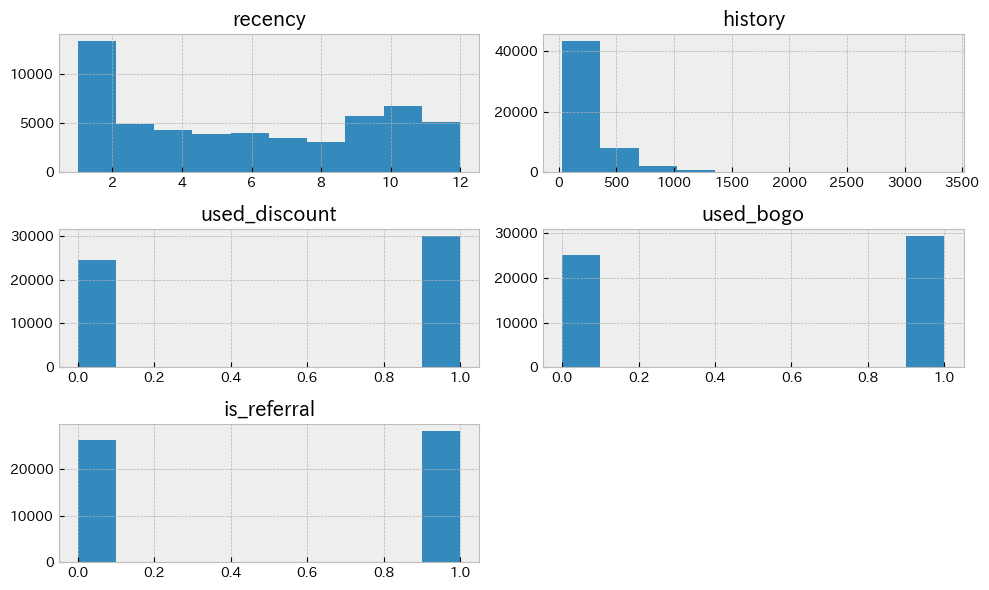

In [8]:
#可視化
df_0.hist();
plt.tight_layout()

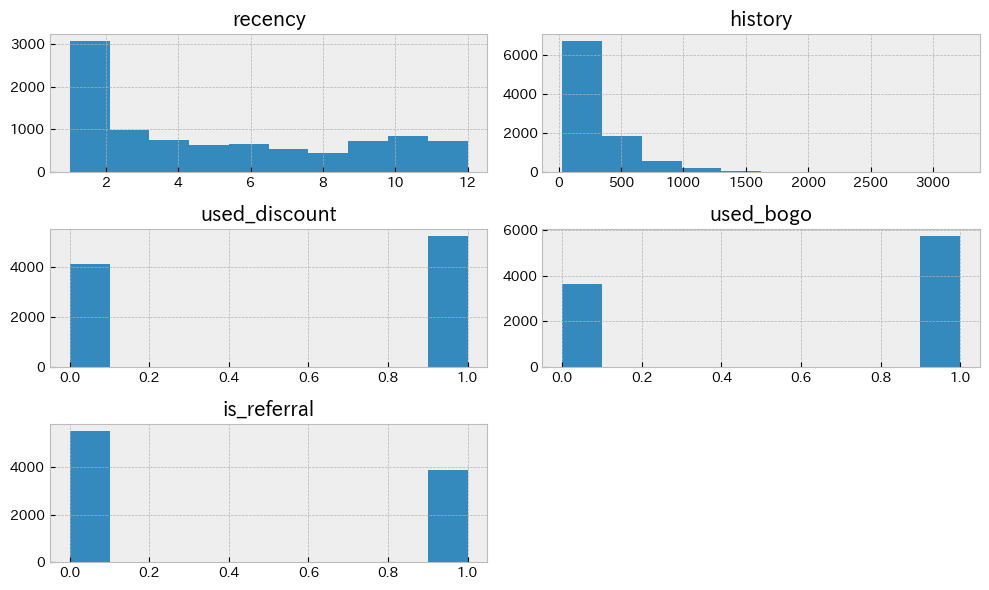

In [9]:
#可視化
df_1.hist();
plt.tight_layout()

##代表値の確認

In [10]:
#カテゴリカル変数を数値に変換
# 数値化（OneHotEncoding）
_df_0 = pd.get_dummies(df_0)
_df_0.head()

,recency,history,used_discount,used_bogo,is_referral,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,offer_Buy One Get One,offer_Discount,offer_No Offer
0,10,142.44,1,0,0,False,True,False,False,True,False,True,False,False
1,6,329.08,1,1,1,True,False,False,False,False,True,False,False,True
2,7,180.65,0,1,1,False,True,False,False,False,True,True,False,False
3,9,675.83,1,0,1,True,False,False,False,False,True,False,True,False
4,2,45.34,1,0,0,False,False,True,False,False,True,True,False,False


In [11]:
# 数値化（OneHotEncoding）
_df_1 = pd.get_dummies(df_1)
_df_1.head()

,recency,history,used_discount,used_bogo,is_referral,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,offer_Buy One Get One,offer_Discount,offer_No Offer
0,6,134.83,0,1,0,False,True,False,False,True,False,True,False,False
1,7,548.91,0,1,1,False,False,True,False,True,False,True,False,False
2,2,101.64,0,1,0,False,False,True,False,False,True,False,True,False
3,3,58.13,1,0,1,False,False,True,False,False,True,False,False,True
4,2,118.40,1,0,0,False,True,False,False,False,True,False,True,False


In [12]:
#集計
_df_0.describe(include='all')

,recency,history,used_discount,used_bogo,is_referral,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,offer_Buy One Get One,offer_Discount,offer_No Offer
count,54606.000000,54606.000000,54606.000000,54606.000000,54606.000000,54606,54606,54606,54606,54606,54606,54606,54606,54606
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,46842,29857,32513,48177,30148,30887,36457,37193,35562
mean,5.872505,235.163403,0.549647,0.538988,0.517580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.500573,251.053967,0.497534,0.498482,0.499695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,29.990000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.000000,62.670000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.000000,151.835000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.000000,315.352500,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#集計
_df_1.describe(include='all')

,recency,history,used_discount,used_bogo,is_referral,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,offer_Buy One Get One,offer_Discount,offer_No Offer
count,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394,9394,9394,9394,9394,9394,9394,9394,9394
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,7595,5367,5826,8061,5831,4896,6156,5500,7132
mean,5.131467,282.323739,0.559080,0.612093,0.413136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.481646,280.674183,0.496524,0.487299,0.492423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,29.990000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.000000,80.565000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.000000,202.460000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.000000,384.632500,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##zip_code

In [14]:
df_0_Rural = (_df_0[ _df_0['zip_code_Rural'] == True ].count()).iloc[0] / len(_df_0)
df_0_Surburban = (_df_0[ _df_0['zip_code_Surburban'] == True ].count()).iloc[0] / len(_df_0)
df_0_Urban = (_df_0[ _df_0['zip_code_Urban'] == True ].count()).iloc[0] / len(_df_0)

In [15]:
df_1_Rural = (_df_1[ _df_1['zip_code_Rural'] == True ].count()).iloc[0] / len(_df_1)
df_1_Surburban = (_df_1[ _df_1['zip_code_Surburban'] == True ].count()).iloc[0] / len(_df_1)
df_1_Urban = (_df_1[ _df_1['zip_code_Urban'] == True ].count()).iloc[0] / len(_df_1)

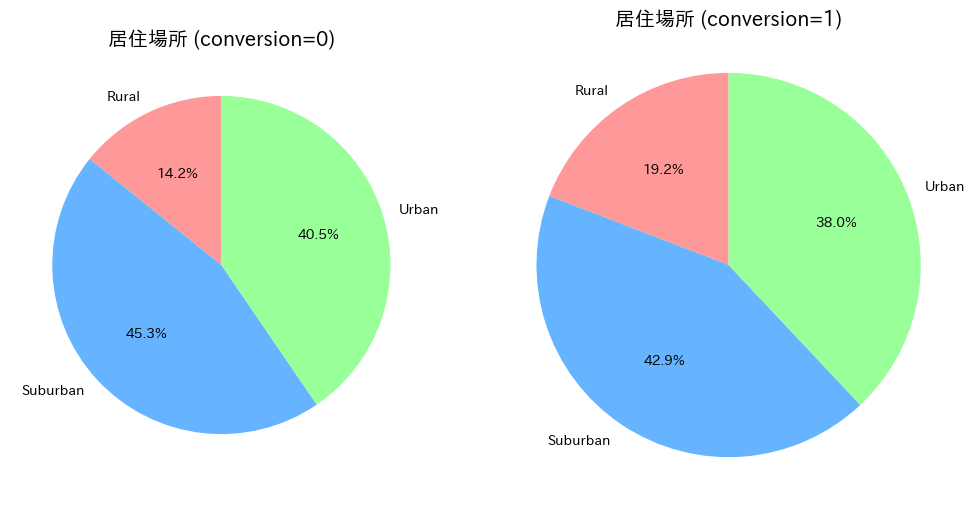

In [16]:
# データ
labels = ['Rural', 'Suburban', 'Urban']
sizes_0 = [df_0_Rural, df_0_Surburban, df_0_Urban]
sizes_1 = [df_1_Rural, df_1_Surburban, df_1_Urban]
colors = ['#ff9999', '#66b3ff', '#99ff99']

# 円グラフを作成
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 左側の円グラフ
ax[0].pie(sizes_0, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax[0].set_title("居住場所 (conversion=0)")

# 右側の円グラフ
ax[1].pie(sizes_1, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax[1].set_title("居住場所 (conversion=1)")

# 円グラフを表示
plt.axis('equal')
plt.show()


##channel

In [17]:
df_0_Multichannel = (_df_0[ _df_0['channel_Multichannel'] == True ].count()).iloc[0] / len(_df_0)
df_0_Phone = (_df_0[ _df_0['channel_Phone'] == True ].count()).iloc[0] / len(_df_0)
df_0_Web = (_df_0[ _df_0['channel_Web'] == True ].count()).iloc[0] / len(_df_0)

In [18]:
df_1_Multichannel = (_df_1[ _df_1['channel_Multichannel'] == True ].count()).iloc[0] / len(_df_1)
df_1_Phone = (_df_1[ _df_1['channel_Phone'] == True ].count()).iloc[0] / len(_df_1)
df_1_Web = (_df_1[ _df_1['channel_Web'] == True ].count()).iloc[0] / len(_df_1)

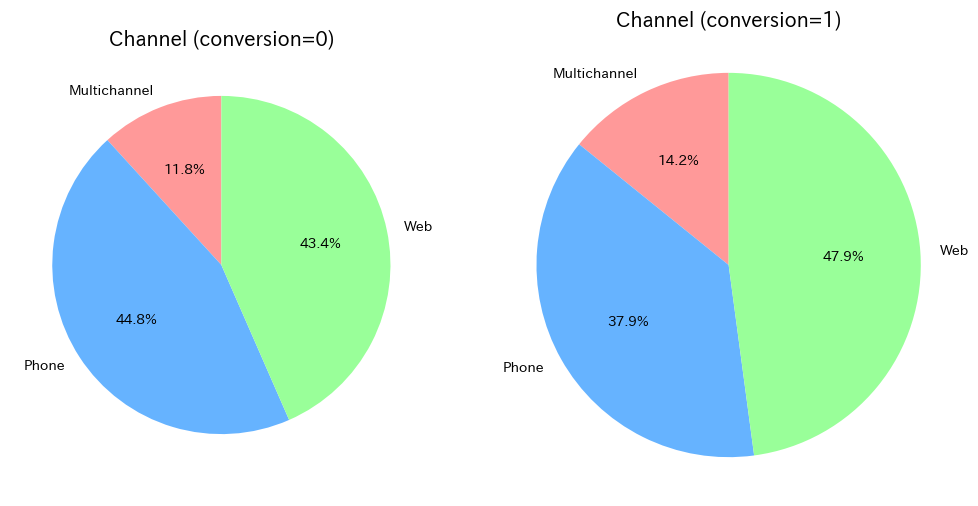

In [19]:
# データ
labels = ['Multichannel', 'Phone', 'Web']
sizes_0 = [df_0_Multichannel, df_0_Phone, df_0_Web]
sizes_1 = [df_1_Multichannel, df_1_Phone, df_1_Web]
colors = ['#ff9999', '#66b3ff', '#99ff99']

# 円グラフを作成
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 左側の円グラフ
ax[0].pie(sizes_0, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax[0].set_title("Channel (conversion=0)")

# 右側の円グラフ
ax[1].pie(sizes_1, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax[1].set_title("Channel (conversion=1)")

# 円グラフを表示
plt.axis('equal')
plt.show()


##offer

In [20]:
df_0_bogo = (_df_0[ _df_0['offer_Buy One Get One'] == True ].count()).iloc[0] / len(_df_0)
df_0_discount = (_df_0[ _df_0['offer_Discount'] == True ].count()).iloc[0] / len(_df_0)
df_0_no_offer = (_df_0[ _df_0['offer_No Offer'] == True ].count()).iloc[0] / len(_df_0)

In [21]:
df_1_bogo = (_df_1[ _df_1['offer_Buy One Get One'] == True ].count()).iloc[0] / len(_df_1)
df_1_discount = (_df_1[ _df_1['offer_Discount'] == True ].count()).iloc[0] / len(_df_1)
df_1_no_offer = (_df_1[ _df_1['offer_No Offer'] == True ].count()).iloc[0] / len(_df_1)

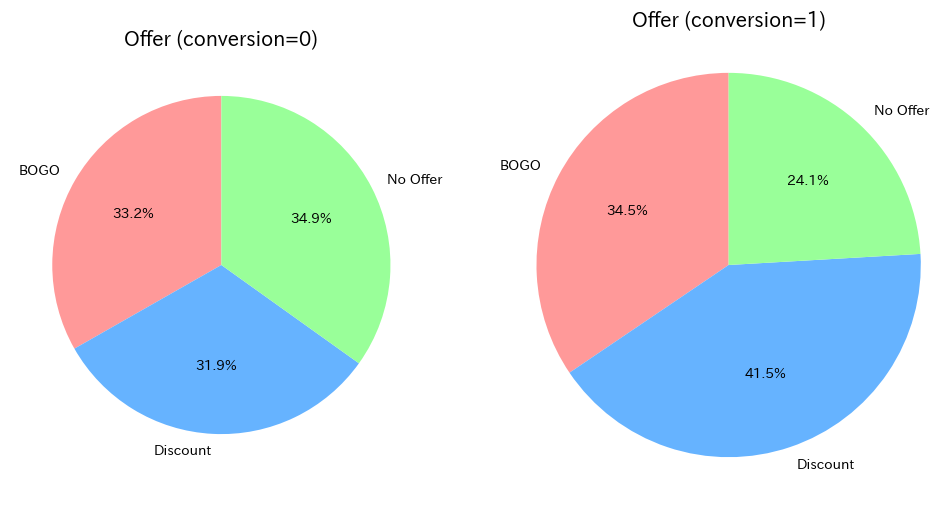

In [22]:
# データ
labels = ['BOGO', 'Discount', 'No Offer']
sizes_0 = [df_0_bogo, df_0_discount, df_0_no_offer]
sizes_1 = [df_1_bogo, df_1_discount, df_1_no_offer]
colors = ['#ff9999', '#66b3ff', '#99ff99']

# 円グラフを作成
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 左側の円グラフ
ax[0].pie(sizes_0, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax[0].set_title("Offer (conversion=0)")

# 右側の円グラフ
ax[1].pie(sizes_1, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax[1].set_title("Offer (conversion=1)")

# 円グラフを表示
plt.axis('equal')
plt.show()

##仮説検定

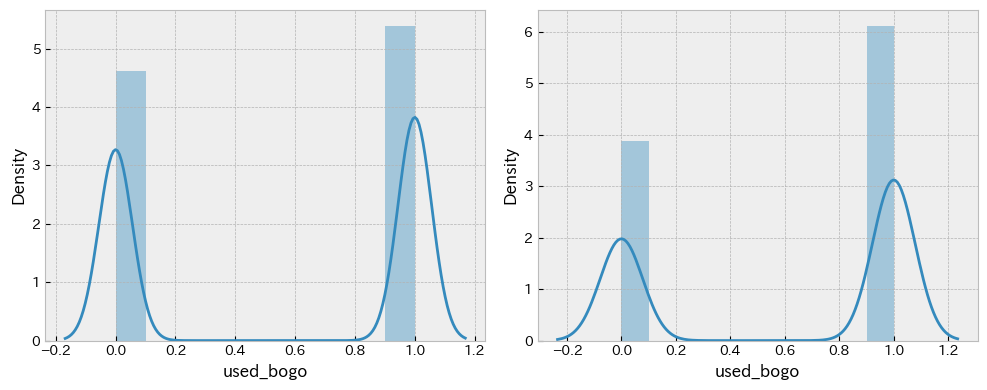

In [23]:
# 分布の確認
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(_df_0['used_bogo'], bins=10)
plt.subplot(1, 2, 2)
sns.distplot(_df_1['used_bogo'], bins=10)
plt.tight_layout()

In [24]:
##正規性の検定
ks_statistic, ks_p_value = stats.kstest(_df_0['used_bogo'], 'norm')
print(f'K-S test statistic: {ks_statistic}, p-value: {ks_p_value}')

K-S test statistic: 0.5, p-value: 0.0


In [25]:
ks_statistic, ks_p_value = stats.kstest(_df_1['used_bogo'], 'norm')
print(f'K-S test statistic: {ks_statistic}, p-value: {ks_p_value}')

K-S test statistic: 0.5, p-value: 0.0


*   帰無仮説：二群間の平均値に差がない μ_a = μ_b
*   対立仮説：二群間の平均値に差があり μ_a < μ_b

In [26]:
# Mann-Whitney(マンホイットニー)のU検定
stats.mannwhitneyu(_df_0['used_bogo'], _df_1['used_bogo'], alternative='less')

MannwhitneyuResult(statistic=237734236.0, pvalue=7.987384848475172e-40)

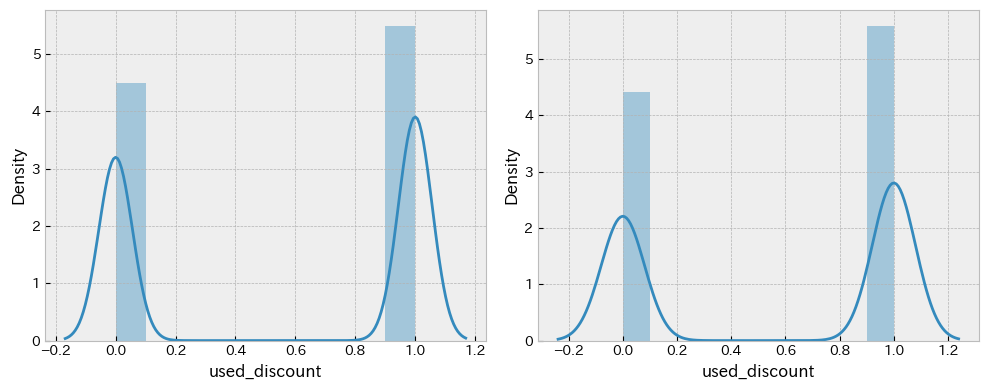

In [33]:
# 分布の確認
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(_df_0['used_discount'], bins=10)
plt.subplot(1, 2, 2)
sns.distplot(_df_1['used_discount'], bins=10)
plt.tight_layout()

In [34]:
##正規性の検定
ks_statistic, ks_p_value = stats.kstest(_df_0['used_discount'], 'norm')
print(f'K-S test statistic: {ks_statistic}, p-value: {ks_p_value}')

K-S test statistic: 0.5, p-value: 0.0


In [35]:
##正規性の検定
ks_statistic, ks_p_value = stats.kstest(_df_1['used_discount'], 'norm')
print(f'K-S test statistic: {ks_statistic}, p-value: {ks_p_value}')

K-S test statistic: 0.5, p-value: 0.0


In [36]:
# Mann-Whitney(マンホイットニー)のU検定
stats.mannwhitneyu(_df_0['used_discount'], _df_1['used_discount'], alternative='less')

MannwhitneyuResult(statistic=254064784.0, pvalue=0.04475372399518894)

##クロス集計表

In [27]:
crosstab1 = pd.crosstab(_df_1['used_bogo'],_df_1['used_discount'] )
crosstab1

used_discount,0,1
used_bogo,,
0,0,3644
1,4142,1608


In [28]:
crosstab2 = pd.crosstab(_df_1['used_bogo'],_df_1['is_referral'] )
crosstab2

is_referral,0,1
used_bogo,,
0,2283,1361
1,3230,2520


In [29]:
crosstab3 = pd.crosstab(_df_1['used_bogo'],df_1['zip_code'] )
crosstab3

zip_code,Rural,Surburban,Urban
used_bogo,,,
0,725,1534,1385
1,1074,2493,2183


In [30]:
crosstab4 = pd.crosstab(_df_1['used_bogo'],df_1['channel'] )
crosstab4

channel,Multichannel,Phone,Web
used_bogo,,,
0,399,1394,1851
1,934,2169,2647


In [31]:
crosstab5 = pd.crosstab(_df_1['used_bogo'], df_1['offer'])
crosstab5

offer,Buy One Get One,Discount,No Offer
used_bogo,,,
0,1067,1615,962
1,2171,2279,1300


In [32]:
crosstab6 = pd.crosstab(df['used_bogo'], df['conversion'])
crosstab6

conversion,0,1
used_bogo,,
0,25174,3644
1,29432,5750
